In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import numpy as np
from kneed import KneeLocator  # For detecting the bend (elbow point)

In [67]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, 3:5].values
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


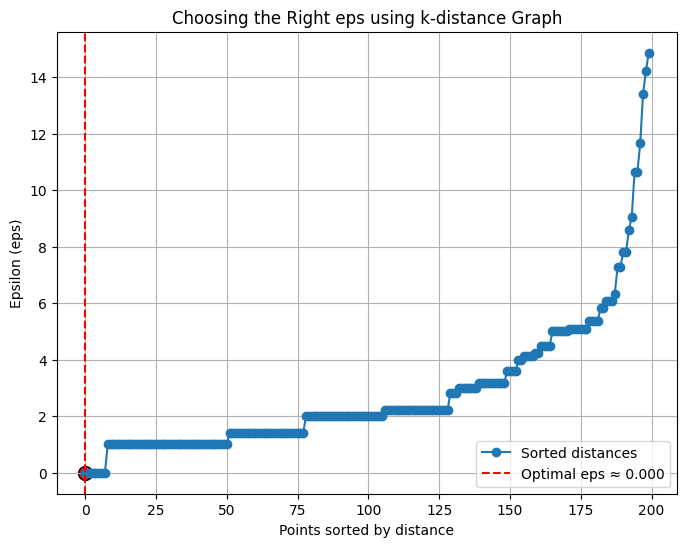

In [68]:
# Sample dataset
data = X

# Compute distances for the 2nd nearest neighbor (as MinPts=2)
nbrs = NearestNeighbors(n_neighbors=2).fit(data)
distances, _ = nbrs.kneighbors(data)

# Sort distances
distances = np.sort(distances[:, 1])

# Detect the optimal "elbow" point
knee_locator = KneeLocator(range(len(distances)), distances, curve="concave", direction="increasing")
optimal_eps = distances[knee_locator.knee]  # Epsilon value at the elbow

# Plot k-distance graph
plt.figure(figsize=(8, 6))
plt.plot(distances, marker="o", linestyle="-", label="Sorted distances")

# Highlight the elbow point
plt.axvline(x=knee_locator.knee, color='r', linestyle="--", label=f"Optimal eps ≈ {optimal_eps:.3f}")
plt.scatter(knee_locator.knee, optimal_eps, color='red', s=100, edgecolors='black')

# Labels and grid
plt.xlabel("Points sorted by distance")
plt.ylabel("Epsilon (eps)")
plt.title("Choosing the Right eps using k-distance Graph")
plt.legend()
plt.grid(True)
plt.show()


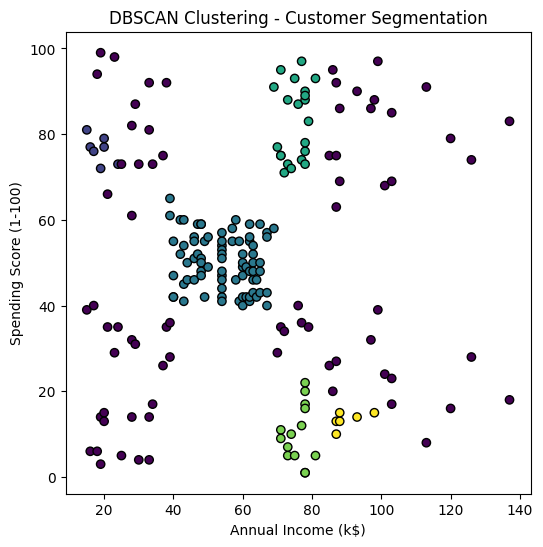

In [78]:
# Standardizing data for DBSCAN
X_scaled = StandardScaler().fit_transform(X)

# Running DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=4)
clusters = dbscan.fit_predict(X_scaled)

# Adding clusters to dataset
dataset['Cluster'] = clusters

# Visualizing Clusters
plt.figure(figsize=(6,6))
#plt.scatter(dataset['Annual Income (k$)'], dataset['Spending Score (1-100)'], c=dataset['Cluster'], cmap='viridis', edgecolors='k')
plt.scatter(dataset['Annual Income (k$)'], dataset['Spending Score (1-100)'], c=dataset['Cluster'], cmap='viridis', edgecolors='k')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("DBSCAN Clustering - Customer Segmentation")
plt.show()

In [79]:
mask = clusters != -1
if len(set(clusters[mask])) > 1:   # Need at least 2 clusters
    chillout_score = silhouette_score(X[mask], clusters[mask])
else:
    chillout_score = -1  # Not valid

print("Chillout Score:", chillout_score)

Chillout Score: 0.6169024827538532


In [ ]:
📌 DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

1. Key Concepts

DBSCAN is based on density instead of distance/centroid (like K-Means).

ε (eps): Maximum radius of neighborhood.

min_samples: Minimum number of points required to form a dense region.

Core Point: A point with at least min_samples within eps.

Border Point: A point within eps of a core point but not itself a core.

Noise (Outlier): A point that is neither core nor border.

👉 Clusters are formed by connecting core points and their reachable neighbors.


2. How the Algorithm Works (AP – Algorithm Process)

Step by step:

Pick a point that is not visited yet.

If it has enough neighbors (min_samples within eps) → mark as Core Point and create a cluster.

Expand cluster by including all reachable points (both core and border).

If the point doesn’t meet density criteria → mark as Noise (may later become border if another cluster reaches it).

Repeat until all points are processed.

3. Advantages of DBSCAN

✅ No need to specify number of clusters (unlike K-Means).
✅ Finds arbitrarily shaped clusters (not just circular).
✅ Robust to noise → automatically identifies outliers.
✅ Works well with large datasets.

4. Disadvantages of DBSCAN

❌ Choosing good values for ε and min_samples is hard.
❌ Struggles with clusters of different densities (one dense cluster and one sparse cluster may confuse DBSCAN).
❌ Not great with high-dimensional data (distance becomes less meaningful → “curse of dimensionality”).
❌ Sensitive to scale → feature scaling/normalization often required.

5. Applications of DBSCAN

📍 Geospatial Data: Finding clusters of geographical points (e.g., earthquakes, crime hotspots, taxi drop-offs).

🛒 Customer Segmentation: Identifying natural groups in purchase behavior.

📡 Anomaly/Outlier Detection: Detecting fraud transactions, network intrusions, unusual sensor readings.

🎶 Recommendation Systems: Grouping users/items with similar patterns.

🧬 Biology/Genomics: Identifying groups of similar gene expressions.

🌌 Astronomy: Discovering star/galaxy clusters.